In [ ]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import LeaveOneOut
import heapq
import operator
import itertools
import sys, os
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ratings_Beauty/ratings.csv')
#df = pd.read_csv('ratings.csv')

In [ ]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4,964982703
1,1,3,4,964981247
2,1,6,4,964982224
3,1,47,5,964983815
4,1,50,5,964982931


In [ ]:
df.shape

(100836, 4)

In [ ]:
len(df.userId.unique())

610

In [ ]:
len(df.movieId.unique())

9724

In [ ]:
df.rating.unique()

array([4, 5, 3, 2, 1])

In [ ]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100836 non-null  int64
 1   movieId    100836 non-null  int64
 2   rating     100836 non-null  int64
 3   timestamp  100836 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


<AxesSubplot:xlabel='rating', ylabel='count'>

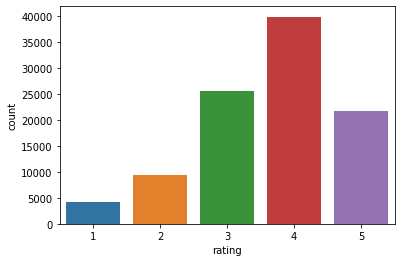

In [ ]:
sns.countplot(x='rating',data=df)

In [ ]:
product_ratings = df.groupby('movieId')['rating'].count()
product_ratings.sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [ ]:
user_ratings = df.groupby('userId')['rating'].count().sort_values(ascending = False)
user_ratings

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: rating, Length: 610, dtype: int64

In [ ]:
print('Number of users who rate 5 on products:',len(df[df['rating']==5]['userId'].unique()))
print('Number of users who rate 4 on products:',len(df[df['rating']==4]['userId'].unique()))
print('Number of users who rate 3 on products:',len(df[df['rating']==3]['userId'].unique()))
print('Number of users who rate 2 on products:',len(df[df['rating']==2]['userId'].unique()))
print('Number of users who rate 1 on products:',len(df[df['rating']==1]['userId'].unique()))

Number of users who rate 5 on products: 598
Number of users who rate 4 on products: 607
Number of users who rate 3 on products: 596
Number of users who rate 2 on products: 503
Number of users who rate 1 on products: 393


In [ ]:
rating = pd.DataFrame(df.groupby('movieId')['rating'].mean().sort_values(ascending=False))

In [ ]:
rating['number of ratings'] = pd.DataFrame(df.groupby('movieId')['rating'].count().sort_values(ascending=False))

In [ ]:
rating.sort_values('number of ratings',ascending=False)

,rating,number of ratings
movieId,,
356,4.270517,329
318,4.529968,317
296,4.296417,307
593,4.268817,279
2571,4.320144,278
...,...,...
27134,4.000000,1
27022,4.000000,1
27006,4.000000,1


<AxesSubplot:xlabel='movieId'>

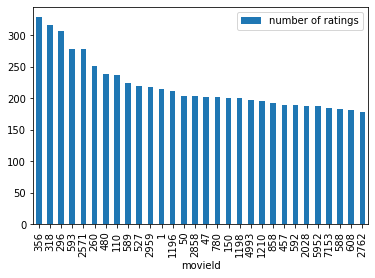

In [ ]:
rating[['number of ratings']].sort_values('number of ratings',ascending=False).head(30).plot(kind = 'bar')

In [ ]:
ratings_utility_matrix = df.pivot_table(values='rating',index = 'userId',columns='movieId',fill_value=0)

In [ ]:
ratings_utility_matrix = ratings_utility_matrix.T

In [ ]:
ratings_utility_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4,0,0,0,4,0,5,0,0,0,...,4,0,4,3,4,3,4,3,3,5
2,0,0,0,0,0,4,0,4,0,0,...,0,4,0,5,4,0,0,2,0,0
3,4,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,5,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def similarity_measures(u1 ,u2):
    global both_voted
    v0,v1,v2,v3,v4 = [] , [] , [] , [] , []
    global v0xy
    global v1xy
    global v2xy
    global v3xy
    global v4xy 
    global mean_xy
    global sigma_xy
    global Jaccard_xy
    v0xy,v1xy,v2xy,v3xy,v4xy = 0,0,0,0,0
    mean_xy=0
    sigma_xy=0
    Jaccard_xy=0

    both_voted = ratings_utility_matrix[np.multiply(ratings_utility_matrix[u1],ratings_utility_matrix[u2])!=0]
    if both_voted.shape[0] != 0:
        vote_diff = np.abs(np.subtract(both_voted[u1],both_voted[u2]))
        v0 = [i for i in vote_diff if i==0]
        v1 = [i for i in vote_diff if i==1]
        v2 = [i for i in vote_diff if i==2]
        v3 = [i for i in vote_diff if i==3]
        v4 = [i for i in vote_diff if i==4]

        b0xy = len(v0)
        b1xy = len(v1)
        b2xy = len(v2)
        b3xy = len(v3)
        b4xy = len(v4)

        Gxy = both_voted

        diff = both_voted[u1]-both_voted[u2]
        #tot_sqrd_sum_mean = np.sum([(i/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min()))**2 for i in diff])
        tot_sqrd_sum_mean = np.sum([(i/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min()))**2 if (ratings_utility_matrix[[u1,u2]].max().max() != ratings_utility_matrix[[u1,u2]].min().min()) else (i/(ratings_utility_matrix[[u1,u2]].max().max() + ratings_utility_matrix[[u1,u2]].min().min())/2)**2 for i in diff])
        mean_xy = 1 - (1/Gxy.shape[0])*tot_sqrd_sum_mean


        #tot_sqrd_sum_sigma = np.sum([((i/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min()))**2 - (1-mean_xy))**2 for i in diff])
        tot_sqrd_sum_sigma = np.sum([((i/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min()))**2 - (1-mean_xy))**2 if (ratings_utility_matrix[[u1,u2]].max().max() != ratings_utility_matrix[[u1,u2]].min().min()) else ((i/(ratings_utility_matrix[[u1,u2]].max().max() + ratings_utility_matrix[[u1,u2]].min().min())/2)**2 - (1-mean_xy))**2 for i in diff])
        sigma_xy = np.sqrt((1/Gxy.shape[0])*tot_sqrd_sum_sigma)


        #either_voted = ratings_utility_matrix[(ratings_utility_matrix[u1]+ratings_utility_matrix[u2])!=0] 
        #Jaccard_xy = len(Gxy)/len(either_voted)
        
        l1 = ratings_utility_matrix[u1].tolist()
        l2 = ratings_utility_matrix[u2].tolist()
        
        def jaccard_set(list1, list2):
            "Define Jaccard Similarity function for two sets"
            intersection = len(list(set(l1).intersection(l2)))
            union = (len(l1) + len(l2)) - intersection
            Jaccard_xy = float(intersection) / union
            return Jaccard_xy
        
        if (ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min())!=0:
            v0xy = b0xy/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min())
            v1xy = b1xy/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min())
            v2xy = b2xy/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min())
            v3xy = b3xy/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min())
            v4xy = b4xy/(ratings_utility_matrix[[u1,u2]].max().max() - ratings_utility_matrix[[u1,u2]].min().min())
        
        else:
            v0xy = b0xy/(ratings_utility_matrix[[u1,u2]].max().max() + ratings_utility_matrix[[u1,u2]].min().min())/2
            v1xy = b1xy/(ratings_utility_matrix[[u1,u2]].max().max() + ratings_utility_matrix[[u1,u2]].min().min())/2
            v2xy = b2xy/(ratings_utility_matrix[[u1,u2]].max().max() + ratings_utility_matrix[[u1,u2]].min().min())/2
            v3xy = b3xy/(ratings_utility_matrix[[u1,u2]].max().max() + ratings_utility_matrix[[u1,u2]].min().min())/2
            v4xy = b4xy/(ratings_utility_matrix[[u1,u2]].max().max() + ratings_utility_matrix[[u1,u2]].min().min())/2

    else:
        print(f'No simultaneous votes found for user {u1} and {u2}')
    return f'value of v0xy is : {v0xy}' , f'value of v1xy is : {v1xy}' , f'value of v2xy is : {v2xy}' , f'value of v3xy is : {v3xy}' , f'value of v4xy is : {v4xy}' , f'value of mean_xy is : {mean_xy}' , f'value of sigma_xy is : {sigma_xy}' , f'value of Jaccard_xy is : {Jaccard_xy}' 

In [ ]:
def MJD(u1,u2):
    values=[]
    weights=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
    for i in range(0,len(similarity_measures(u1,u2))):
        if both_voted.shape[0] != 0:
            values.append(float(similarity_measures(u1,u2)[i].split()[-1]))
        else:
            values=0
    MJD_xy = np.sum(np.multiply(weights,values))/len(weights)
    return MJD_xy
   

In [ ]:
temp_stdout = None

# Disable
def blockPrint():
    global temp_stdout
    temp_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    global temp_stdout
    sys.stdout = temp_stdout

In [ ]:
def predict(u1 , k=1):
  global voted_list
  global I_v_list
  global U_t
  global mean_jaccard_differences
  global pred_list
  pred=0
  
  voted_list_indices = [ratings_utility_matrix[u1].values.tolist()[i] for i in range(0,ratings_utility_matrix[u1].shape[0]) if ratings_utility_matrix[u1].values.tolist()[i]!=0]
  voted_list_of_list = [ratings_utility_matrix.index[ratings_utility_matrix[u1]==i].tolist() for i in voted_list_indices]
  voted_list_of_list.sort()
  voted_list = sum(list(k for k,_ in itertools.groupby(voted_list_of_list)), [])
  if (len(voted_list)>1) & (len(voted_list)<=20):
      loo = LeaveOneOut()
      I_v=[]
      for tr , va in loo.split(voted_list):
          #print("validation set: %s Training set: %s" % ([voted_list[int(te)]] , [voted_list[i] for i in tr]))
          I_v.append([voted_list[int(va)]])
          I_v_list = [i[0] for i in I_v]
      print(f'\033[1mvalidation set: {I_v_list}\033[0m'+'\n')
      
      U_v = [u1]
      #U_t = ratings_utility_matrix.drop(u1 , axis='columns').sample(5 , axis=1).columns
      U_t = ratings_utility_matrix.drop(u1 , axis='columns').columns
      print(print(f'user training set: {U_t}\n'))

      mean_jaccard_differences=[MJD(u1,i) for i in U_t]
      print('\n')
      print(f'mean_jaccard_differences:{mean_jaccard_differences}\n')
      
      pred_list=[]
      for j in I_v_list:
          print(f'Fold {I_v_list.index(j)}')
          print(f'validation item {I_v_list.index(j)+1} : {j}')
          
          if not all(v == 0 for v in mean_jaccard_differences):
              top_k_neighbours_indices = list(zip(*heapq.nlargest(k, enumerate(mean_jaccard_differences), key=operator.itemgetter(1))))[0]

              top_k_neighbours=[U_t[top_k_neighbours_indices[i]] for i in range(0,len(top_k_neighbours_indices))]

              ratings = ratings_utility_matrix[top_k_neighbours].loc[j,:]
              
              if all(v == 0 for v in ratings):
                  print(f'A rating cannot be predicted, non of the training users voted for item {j}')
              else:
                  pred = np.nanmean([np.nan if i==0 else i for i in ratings])
              
              print(f'\033[1mpredicted rate for item {j} is {pred} \033[0m \n')
          else:
              print('\033[1mall mean_jaccard_differences are zero\033[0m \n') 
          pred_list.append(pred)    
          print('\033[1m===========================================================\033[0m')
  elif len(voted_list)<=1:
      print('no sufficient interactions found')
  else:
      print('not a cold user')
  #print(pred_list)
  return pred_list

In [ ]:
def Coverage(u1 , k=1):   
    not_voted_list_indices = [ratings_utility_matrix[u1].values.tolist()[i] for i in range(0,ratings_utility_matrix[u1].shape[0]) if ratings_utility_matrix[u1].values.tolist()[i]==0]
    not_voted_list_of_list = [ratings_utility_matrix.index[ratings_utility_matrix[u1]==i].tolist() for i in not_voted_list_indices]
    not_voted_list_of_list.sort()
    not_voted_list = sum(list(k for k,_ in itertools.groupby(not_voted_list_of_list)), [])
    
    loo = LeaveOneOut()
    I_v=[]
    for tr , va in loo.split(not_voted_list):
        I_v.append([not_voted_list[int(va)]])
        I_v_list = [i[0] for i in I_v]
    pred_count=0
    not_pred_count=0
    MJD_0_count=0
    for j in I_v_list:
        if not all(v == 0 for v in mean_jaccard_differences):
            top_k_neighbours_indices = list(zip(*heapq.nlargest(k, enumerate(mean_jaccard_differences), key=operator.itemgetter(1))))[0]
            top_k_neighbours=[U_t[top_k_neighbours_indices[i]] for i in range(0,len(top_k_neighbours_indices))]

            ratings = ratings_utility_matrix[top_k_neighbours].loc[j,:]
            if all(v == 0 for v in ratings):
                not_pred_count+=1
            else:
                pred_count+=1
        else:
            MJD_0_count+=1     
    print(f'Coverage of user \033[1m{u1}\033[0m is \033[1m{(pred_count/len(not_voted_list))*100}%\033[0m')


In [ ]:
MAE =[]
def Mean_absolute_error(u1,k):
  actual_ratings = ratings_utility_matrix[u1].loc[voted_list].tolist()
  if all(v == 0 for v in mean_jaccard_differences):
    print('no prediction calculated')
  else:
    for i in range(0,len(voted_list)):
      blockPrint()
      pred_list = predict(u1,k)
      enablePrint()
      if pred_list[i]!=0:
        print(f'Mean absolute error for item \033[1m{voted_list[i]}\033[0m : \033[1m{np.abs(actual_ratings[i] - pred_list[i])}\033[0m')
        MAE.append(np.abs(actual_ratings[i] - pred_list[i]))
      else:
        MAE.append(np.nan)
    print('\n')
  print('========================================================================\n') 
  print(f'Mean absolute error for user \033[1m{u1}\033[0m is \033[1m{np.nanmean(MAE)}\033[0m ')
  return np.nanmean(MAE)
  

In [ ]:
predict(53)

validation set: [203, 249, 381, 413, 481, 748, 880, 916, 922, 1049, 1100, 1125, 1256, 1298, 1441, 1982, 2616, 2686, 3100, 4019]

user training set: Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
           dtype='int64', name='userId', length=609)

None
No simultaneous votes found for user 53 and 2
No simultaneous votes found for user 53 and 3
No simultaneous votes found for user 53 and 4
No simultaneous votes found for user 53 and 5
No simultaneous votes found for user 53 and 7
No simultaneous votes found for user 53 and 8
No simultaneous votes found for user 53 and 10
No simultaneous votes found for user 53 and 12
No simultaneous votes found for user 53 and 13
No simultaneous votes found for user 53 and 14
No simultaneous votes found for user 53 and 15
No simultaneous votes found for user 53 and 16
No simultaneous votes found for user 53 and 18
No simultaneous votes found for user 53 and 21


[3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 3.0,
 2.0]

In [ ]:
Coverage(53)

Coverage of user 53 is 25.38128606760099%


In [ ]:
mae=[]
blockPrint()
for i in np.arange(1,len(U_t),10):
  mae.append(Mean_absolute_error(53,i))
enablePrint()

In [ ]:
mae

NameError: ignored

In [ ]:
mae=[]
for i in range(1,len(U_t)+1):
  mae.append(quality_measures(53,i))

A rating cannot be predicted, non of the training users voted for item 249
A rating cannot be predicted, non of the training users voted for item 381
A rating cannot be predicted, non of the training users voted for item 1125
A rating cannot be predicted, non of the training users voted for item 1256
A rating cannot be predicted, non of the training users voted for item 2686
A rating cannot be predicted, non of the training users voted for item 381
A rating cannot be predicted, non of the training users voted for item 1125
A rating cannot be predicted, non of the training users voted for item 1256


In [ ]:
np.arange(1,len(U_t),10)

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601])

<AxesSubplot:>

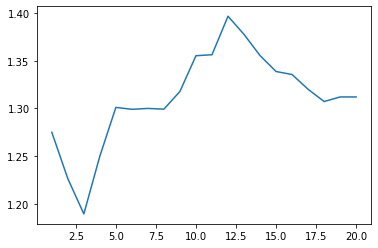

In [ ]:
sns.lineplot(x=np.arange(1,len(voted_list)+1,1) , y=mae)

In [ ]:
!ls drive/MyDrive

 01-Introduction.gdoc
'04 - SQL-1.gdoc'
'07 - Database Design.gdoc'
 16318647983241651553259925645083.jpg
 1655717302732.jpg
 1655718204799.jpg
 1655718204817.jpg
"Aiya's wedding"
'Assignment 03.gdoc'
 Classroom
'Colab Notebooks'
 CourseIntroduction.gslides
 datax_volvo_additional_files
'datax_volvo_additional_files (1)'
 FM2005
'Getting started.pdf'
'IMG_20210917_131122 (1).jpg'
'Isuru Achintha Ranaweera - CV_compressed.pdf'
'MS 2003 Kuppi'
 new
 Project
'Questionnaire on Atlanta Falcons.gdoc'
 ratings_Beauty
'Romanized Sinhala'
 s14577.java
's14577-Question 1.pdf'
 songs
'Trip to kandy-2021'
 tutorial5.gdoc
 tutorial5.pdf
'Various Types of Keys in DBMS.gdoc'
 Worksheet-1.gdoc


In [ ]:
%cd /content/drive/MyDrive/new

In [ ]:
!pwd

In [ ]:
!git clone https://github.com/layer6ai-labs/DropoutNet.git